# Linear Regression


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train = np.linspace(10, 20, 42)
y_train = 0.5*x_train + 0.5*np.random.randn(x_train.shape[0])

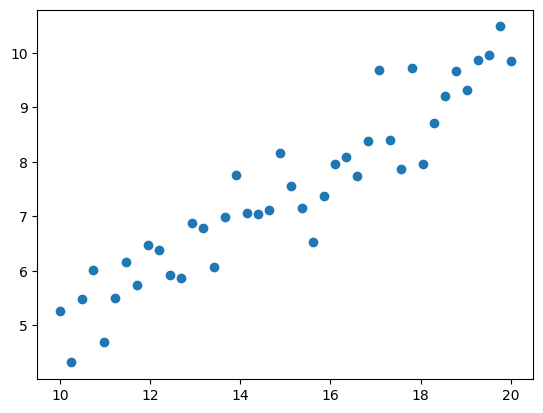

In [ ]:
plt.scatter(x_train, y_train)
plt.show()

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  

In [ ]:
def compute_prediction_and_cost(w, b, x):
  m = x_train.shape[0]
  f_wb = x*w + b
  J = 1/(2*m) * ((f_wb - y_train)**2).sum()
  return f_wb, J

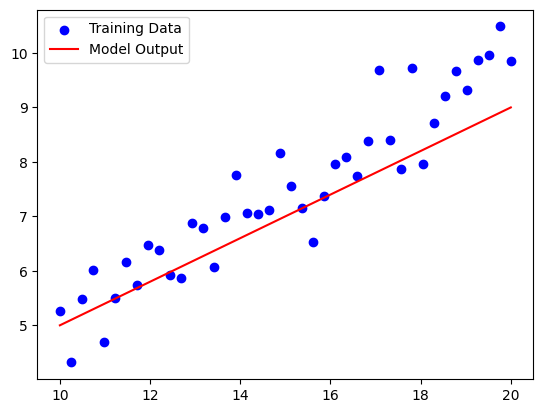

cost:0.28537431781207095


In [ ]:
f_wb, J = compute_prediction_and_cost(0.4, 1, x_train)
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_train, f_wb, color='red', label='Model Output')
plt.legend()
plt.show()
print(f'cost:{J}')

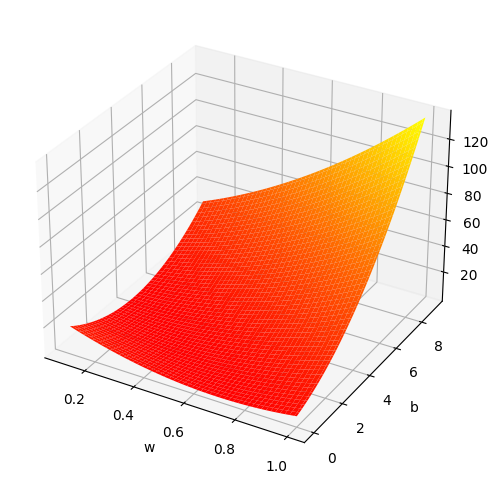

In [ ]:
ws = np.linspace(0.1, 1, 100)
bs = np.linspace(0,9,100)
X, Y = np.meshgrid(ws, bs)
Z = np.zeros((len(ws), len(bs)))
for i, w in enumerate(ws):
  for j, b in enumerate(bs):
    f_wb, J = compute_prediction_and_cost(w, b, x_train)
    Z[i, j] = J

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='autumn')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J')

plt.show()

In [ ]:
min_index_Z = np.unravel_index(np.argmin(Z), Z.shape)
min_value = Z[min_index_Z]
w_ok = ws[min_index_Z[0]]
b_ok = bs[min_index_Z[1]]
print(f'pridiction model: {w_ok}*w + {b_ok}')
print(f'Minimum cost: {min_value}')

pridiction model: 0.49090909090909085*w + 0.09090909090909091
Minimum cost: 0.14151025911357826


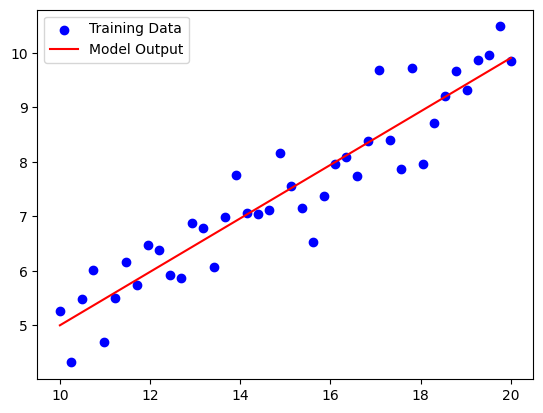

In [ ]:
y_hat, j = compute_prediction_and_cost(ws[min_index_Z[0]], bs[min_index_Z[1]], x_train)
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_train, y_hat, color='red', label='Model Output')
plt.legend()
plt.show()

<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [ ]:
def compute_gradient(w, b, x, y):
  m = x_train.size
  f_wb = w*x + b
  dJ_dw = (1/m)* ((f_wb - y)*x).sum()
  dJ_db = (1/m)* (f_wb - y).sum()
  return dJ_dw, dJ_db

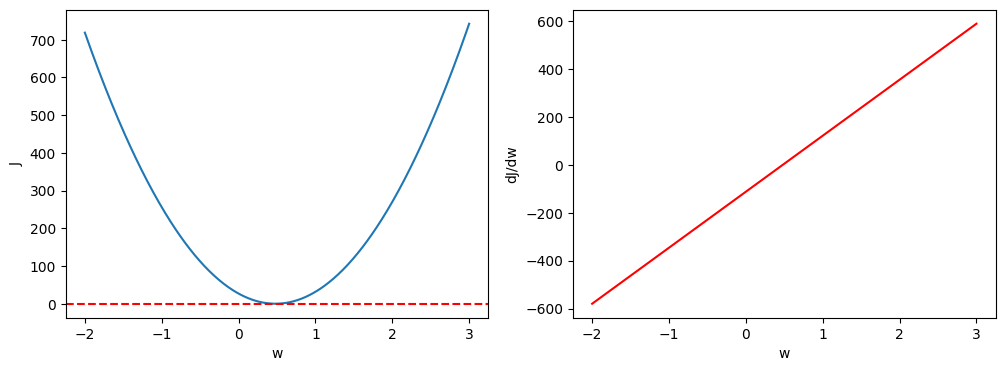

In [ ]:
list_j = []
list_w = []
list_dj_dw = []
for w in np.linspace(-2, 3, 400):
  _, J = compute_prediction_and_cost(w, 0.27, x_train)
  dJ_dw, dJ_db = compute_gradient(w, 0.27, x_train, y_train)
  list_w.append(w)
  list_j.append(J)
  list_dj_dw.append(dJ_dw)
fig, axs = plt.subplots(1,2, figsize=(12, 4))
axs[0].plot(list_w,list_j)
axs[1].plot(list_w,list_dj_dw, color = 'red')
axs[0].set_xlabel('w')
axs[0].set_ylabel('J')
axs[1].set_xlabel('w')
axs[1].set_ylabel('dJ/dw')
axs[0].axhline(y=0, color='red', linestyle='--')
plt.show()

In [ ]:
def gradient_descent(w0, b0, x, y, num_iter, lr):
  p_history =[]
  j_history =[]
  w = w0
  b = b0
  for i in range(num_iter):
    _, J = compute_prediction_and_cost(w, b, x)
    dJ_dw, dJ_db = compute_gradient(w, b, x, y)
    b = b - lr * dJ_db
    w = w - lr * dJ_dw
    p_history.append([w,b])
    j_history.append(J)
    if i % 1000 == 0:
      print(f'f_wb = {w}*x + {b}, J={J}')
  plt.figure(figsize=(12,4))
  plt.plot(np.arange(len(j_history)), j_history)
  plt.xlabel('Iteration')
  plt.ylabel('Cost')

  plt.show()
  return w, b, j_history, p_history



f_wb = 0.001161920743287746*x + 7.458000575108824e-05, J=29.021017632560824
f_wb = 0.4479478748278169*x + 0.028754274856609766, J=0.4042293446015128
f_wb = 0.4905664764912768*x + 0.031492835241302426, J=0.14383956088467914
f_wb = 0.4946316720468075*x + 0.03175687730837256, J=0.14147022208821194
f_wb = 0.49501926947607816*x + 0.03178487474617983, J=0.1414486620481708
f_wb = 0.49505606195705887*x + 0.031790354909073976, J=0.141448464909328
f_wb = 0.4950593913232086*x + 0.031793686109661434, J=0.14144846215643775
f_wb = 0.4950595287196815*x + 0.031796811275745795, J=0.14144846117301743
f_wb = 0.4950593617021817*x + 0.03179991574303437, J=0.14144846020641147
f_wb = 0.4950591657137835*x + 0.03180301719103555, J=0.14144845924067137


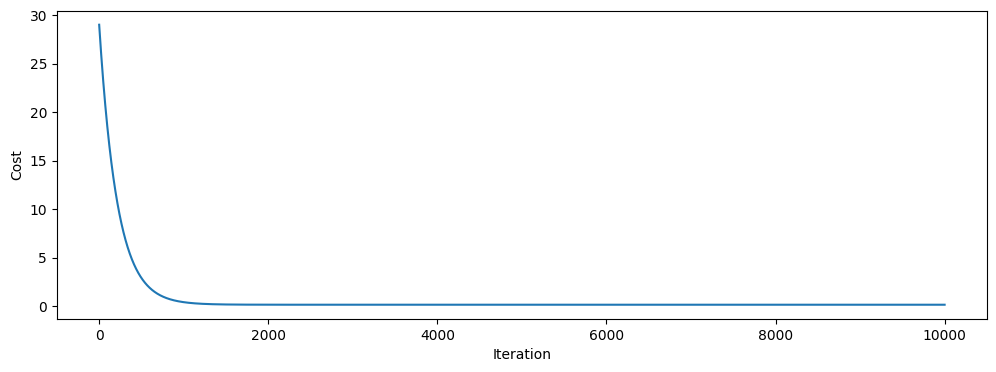

In [ ]:
w, b, j_history, p_history = gradient_descent(0,0,x_train, y_train,10000,1e-05)

In [ ]:
def prediction(x):
  prediction = w*x + b
  return prediction

In [ ]:
y16 = prediction(16)
y16

7.952749589851281